In [9]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

print ('successful')

successful


In [10]:
print(tf.__version__)

2.18.0


In [11]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [12]:
data_dir =r"C:\Users\dell\Downloads\Internship_Project\RiceLeaf-Project4\PRCP-1001-RiceLeaf\Data\rice\rice1"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [13]:
train_path = r'C:\Users\dell\Downloads\Internship_Project\RiceLeaf-Project4\PRCP-1001-RiceLeaf\Data\rice\rice1'
test_path = r'C:\Users\dell\Downloads\Internship_Project\RiceLeaf-Project4\PRCP-1001-RiceLeaf\Data\rice\rice1'

In [14]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [15]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

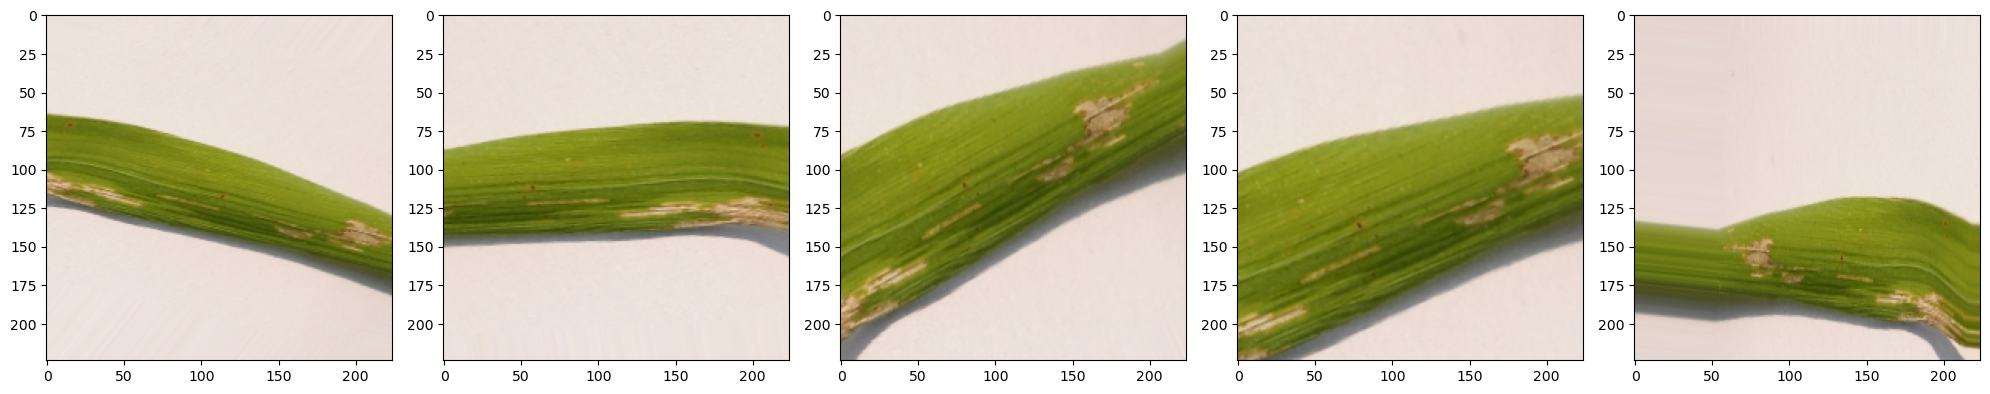

In [16]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

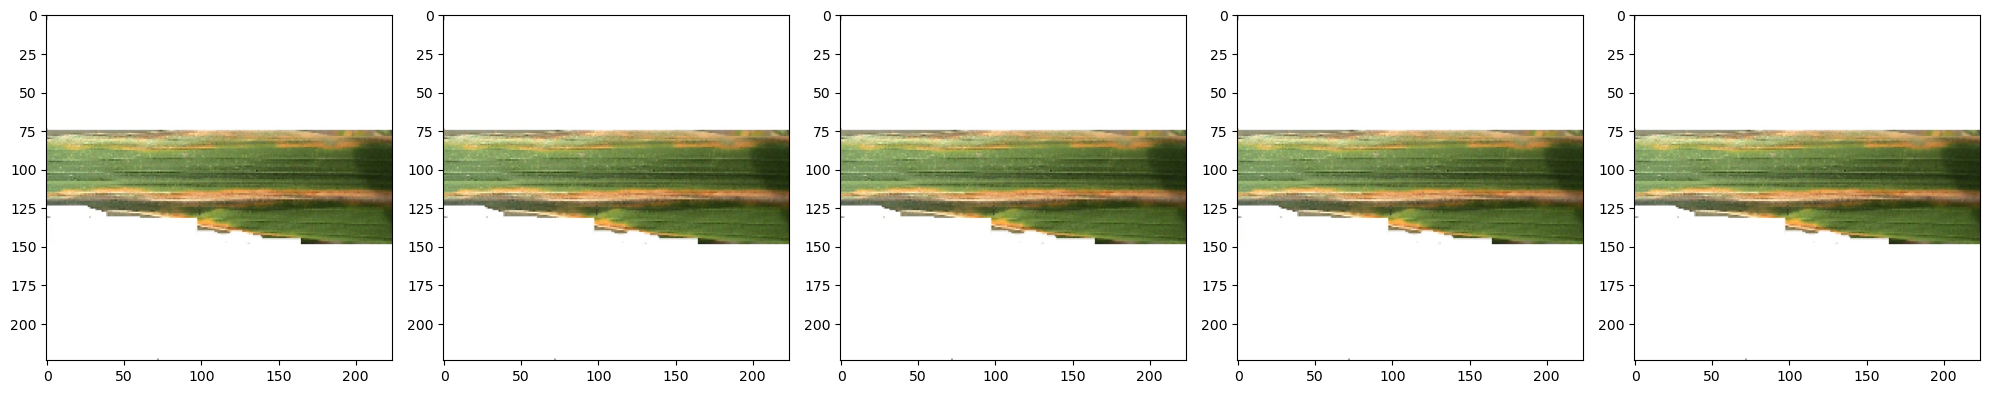

In [17]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [18]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                     │ (None, 222, 222, 16)       │            448 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)        │ (None, 111, 111, 16)       │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_1 (Conv2D)                   │ (None, 109, 109, 32)       │          4,640 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_1 (MaxPooling2D)      │ (None, 54, 54, 32)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_2 (Conv2D)                   │ (None, 52, 52, 64)         │         18,496 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_2 (MaxPooling2D)      │ (None, 26, 26, 64)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten (Flatten)                   │ (None, 43264)              │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                   │ (None, 43264)              │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                       │ (None, 128)                │      5,537,920 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout_1 (Dropout)                 │ (None, 128)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                     │ (None, 3)                  │            387 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 5,561,891 (21.22 MB)

 Trainable params: 5,561,891 (21.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
EPOCHS=50
history = model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 522ms/step - accuracy: 0.2779 - loss: 1.6309 - val_accuracy: 0.4958 - val_loss: 1.0772
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.4095 - loss: 1.0805 - val_accuracy: 0.4454 - val_loss: 0.9984
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step - accuracy: 0.4196 - loss: 1.0285 - val_accuracy: 0.4118 - val_loss: 0.9810
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.4589 - loss: 1.0250 - val_accuracy: 0.7227 - val_loss: 0.8551
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 460ms/step - accuracy: 0.6086 - loss: 0.9147 - val_accuracy: 0.6723 - val_loss: 0.8756
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 0.5758 - loss: 0.9518 - val_accuracy: 0.6891 - val_loss: 0.8732
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.6200 - loss: 0.8900 - val_accuracy: 0.7563 - val_loss: 0.6557
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.6130 - loss: 0.8332 - val_accuracy: 0

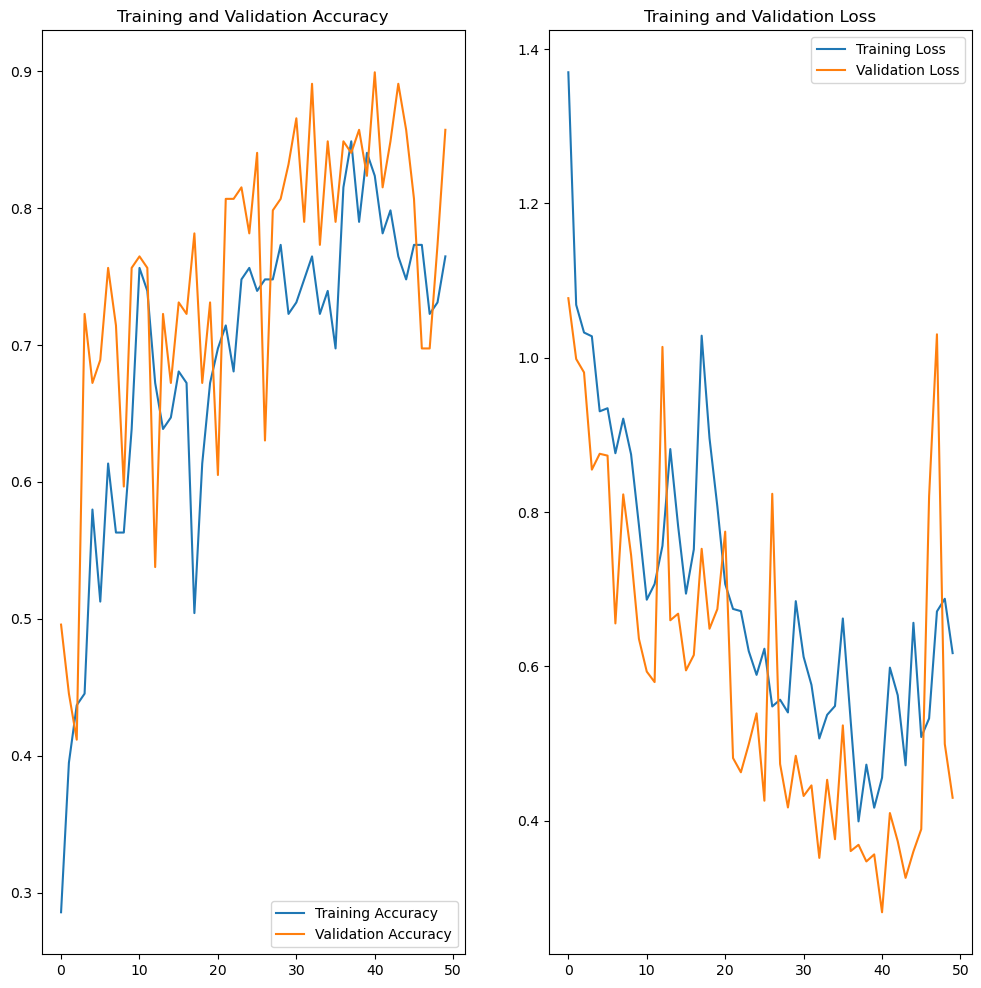

In [20]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model(r'rice-disease-classifier.h5')


In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(image_path, target_size):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert to numpy array
    img_array = img_to_array(img)
    # Rescale to 0-1 (same as during training)
    img_array = img_array / 255.0
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [41]:
image_path = r'C:\Users\dell\Downloads\Internship_Project\RiceLeaf-Project4\PRCP-1001-RiceLeaf\Data\rice\rice1\Bacterial leaf blight\DSC_0365.jpg'
target_size = (IMG_HEIGHT, IMG_WIDTH)

# Prepare the image
prepared_image = prepare_image(image_path, target_size)

# Predict the class
predictions = model.predict(prepared_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
for i in range(0,len(CLASS_NAMES)):
    if(i==predicted_class):
        print(CLASS_NAMES[i])
   


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted class: 0
Leaf Blight


In [42]:
import os

# Use the current working directory
MODEL_PATH = os.path.join(os.getcwd(), "rice-disease-classifier.h5")
